In [ ]:
# https://www.kaggle.com/code/nippani/preprocessing-audio-data-gtzan
# https://www.overleaf.com/4578669278jxjhfckrwhcj
# https://www.kaggle.com/code/abhijith007/genre-classification-cnn
# https://www.kaggle.com/code/satoru90/music-genre-classification-xgb-deep-learning
# https://paperswithcode.com/task/music-genre-classification
# https://paperswithcode.com/paper/music-genre-classification-with-paralleling

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd ..

/


In [ ]:
import os
os.chdir("/gdrive/My Drive/Data")

In [ ]:
%ls

features_30_sec.csv  features_3_sec.csv  model_plot.png


# Import Libraries

In [ ]:
import librosa
import librosa.display # https://stackoverflow.com/questions/43533023/librosa-display-waveplotnp-arrayf-sr-22050-attributeerror-module-obje
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
import random

# Encoders
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential # sequential model
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split # split data into train and split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix # to check model metrices
from keras.utils.vis_utils import plot_model # to visualize the model
import seaborn as sns


# Load Data

In [ ]:
path="genres_original/"

In [ ]:
# genre_classes=os.listdir(path)

In [ ]:
df=pd.read_csv('features_3_sec.csv')

# Data Cleaning

In [ ]:
all_audio=[]
for genre in genre_classes:
  all_audio.append(os.listdir(path+genre))

In [ ]:
# len(all_audio[6])

In [ ]:
corrupt=[]
for audio in all_audio:
  genre=audio[0].split('.')[0]
  for file in audio:
    try:
      samplerate, data = wavfile.read(path+genre+'/'+file)
    except:
      corrupt.append(file)

In [ ]:
corrupt

['jazz.00054.wav']

In [ ]:
%ls


features_30_sec.csv  features_3_sec.csv  genres_original/  images_original/


In [ ]:
df

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0     0.003521             1773.065032          167541.630869   
1     0.001450             1816.693777           90525.690866   
2     0.004620             1788.539719          111407.437613   
3     0.002448             1655.289045          111952.284517   
4     0.001701             1630.656199           79667.267654   
...        ...                     ...                    ...   
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                 1972.744388           117335.771563  ...   39.687145   
1                 2010.051501            65671.875673  ...   64.748276   
2                 2084.565132            75124.921716  ...   67.336563   
3                 1960.039988            82913.639269  ...   47.739452   
4                 1948.503884            60204.020268  ...   30.336359   
...                       ...                     ...  ...         ...   
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -3.241280   36.488243     0.722209   38.099152    -5.050335   
1       -6.055294   40.677654     0.159015   51.264091    -2.837699   
2       -1.768610   28.348579     2.378768   45.717648    -1.938424   
3       -3.841155   28.337118     1.218588   34.770935    -3.580352   
4        0.664582   45.880913     1.689446   51.363583    -3.392489   
...           ...         ...          ...         ...          ...   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0      33.618073    -0.243027   43.771767  blues  
1      97.030830     5.784063   59.943081  blues  
2      53.050835     2.517375   33.105122  blues  
3      50.836224     3.630866   32.023678  blues  
4      26.738789     0.536961   29.146694  blues  
...          ...          ...         ...    ...  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.299545   41.586990   rock  
9988   24.843613     

In [ ]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [ ]:
# Checking null values in features
df.isna().sum().sum()

0

In [ ]:
df=df.drop(df.loc[df.filename == 'jazz.00054.wav'].index)

In [ ]:
df.shape

(9990, 60)

# Data Visualisation

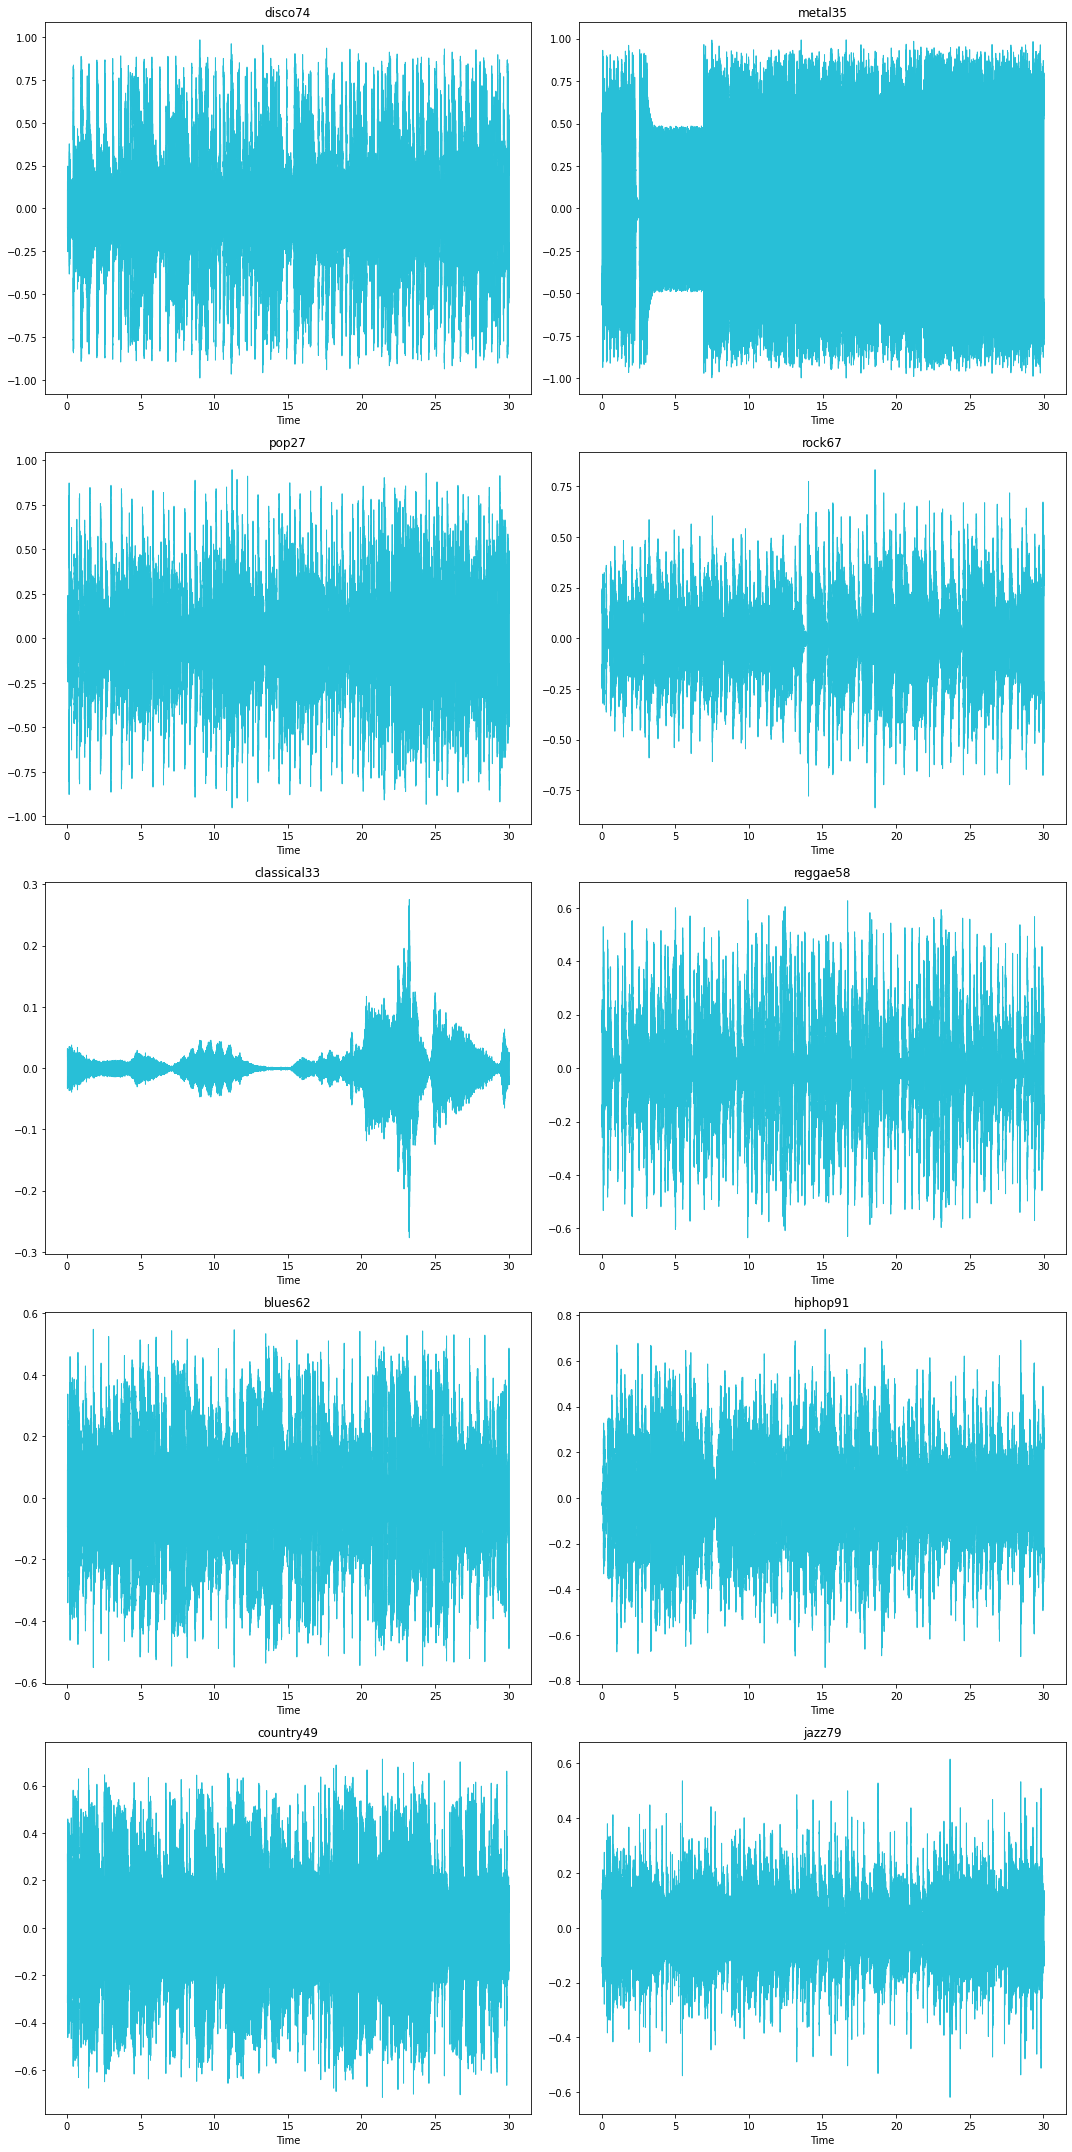

In [ ]:
# https://librosa.org/doc/main/generated/librosa.display.waveshow.html

fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
i,j=0,0
for genre in genre_classes:
    n=random.randint(0, 99)
    if (n<10): file=genre+".0000"+str(n)+".wav"
    else: file=genre+".000"+str(n)+".wav"
    if(file in corrupt): file=genre+".00000.wav"
    number=path + genre + "/" + file
    data,sampling_rate = librosa.load(number) # show amplitude for the first audio of each class
    librosa.display.waveshow(y = data, sr = sampling_rate,x_axis='time', color = "#28bfd7",ax=axes[i][j])
    axes[i][j].set(title=genre+str(n))
    if j==1: i+=1
    j=1-j

plt.tight_layout()
plt.show()

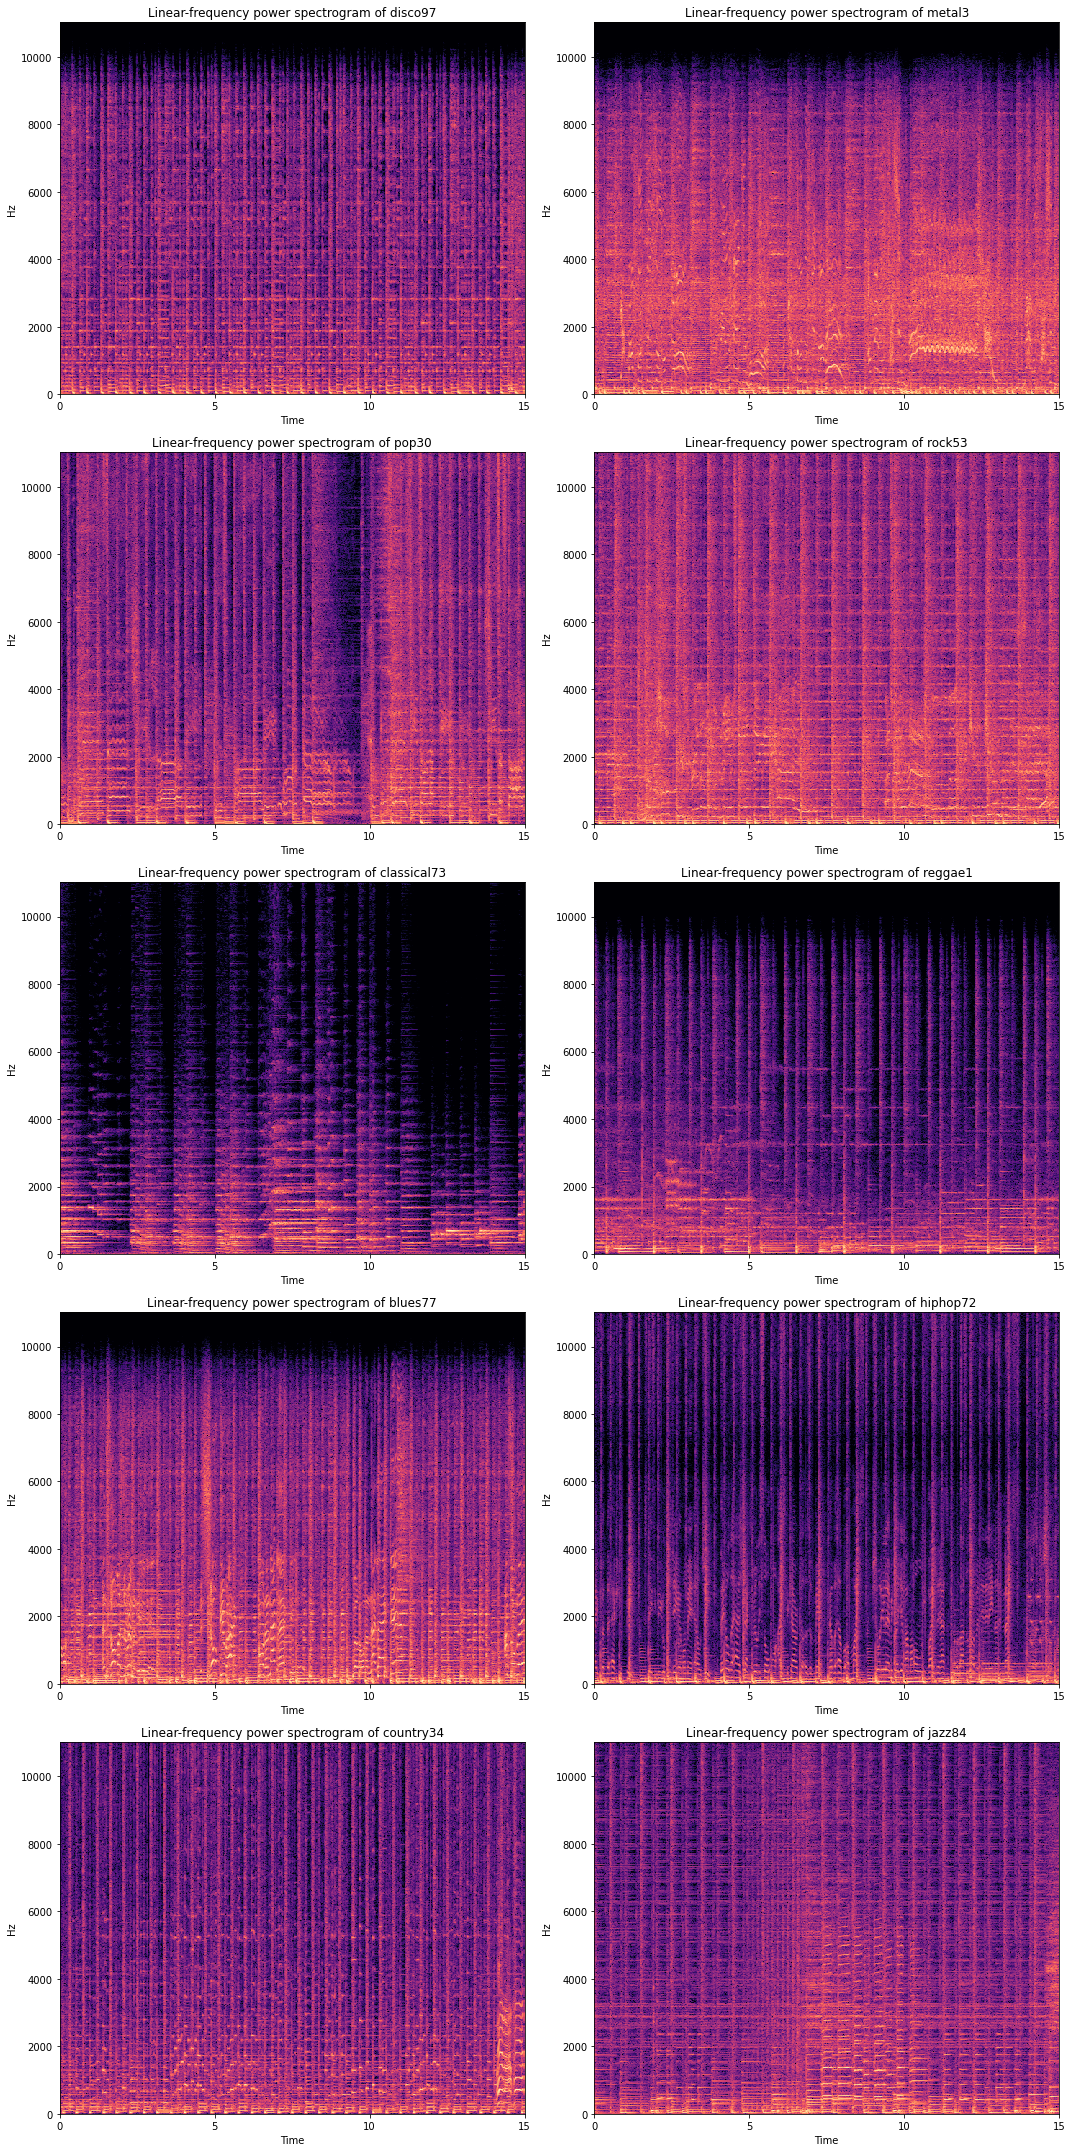

In [ ]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
i,j=0,0
for genre in genre_classes:
    n=random.randint(0, 99)
    if (n<10): file=genre+".0000"+str(n)+".wav"
    else: file=genre+".000"+str(n)+".wav"
    if(file in corrupt): file=genre+".00000.wav"
    number=path + genre + "/" + file
    data, sampling_rate = librosa.load(number, duration=15)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                  sr=sampling_rate, ax=axes[i][j])
    axes[i][j].set(title='Linear-frequency power spectrogram of '+genre+str(n))
    if j==1: i+=1
    j=1-j
plt.tight_layout()
plt.show()

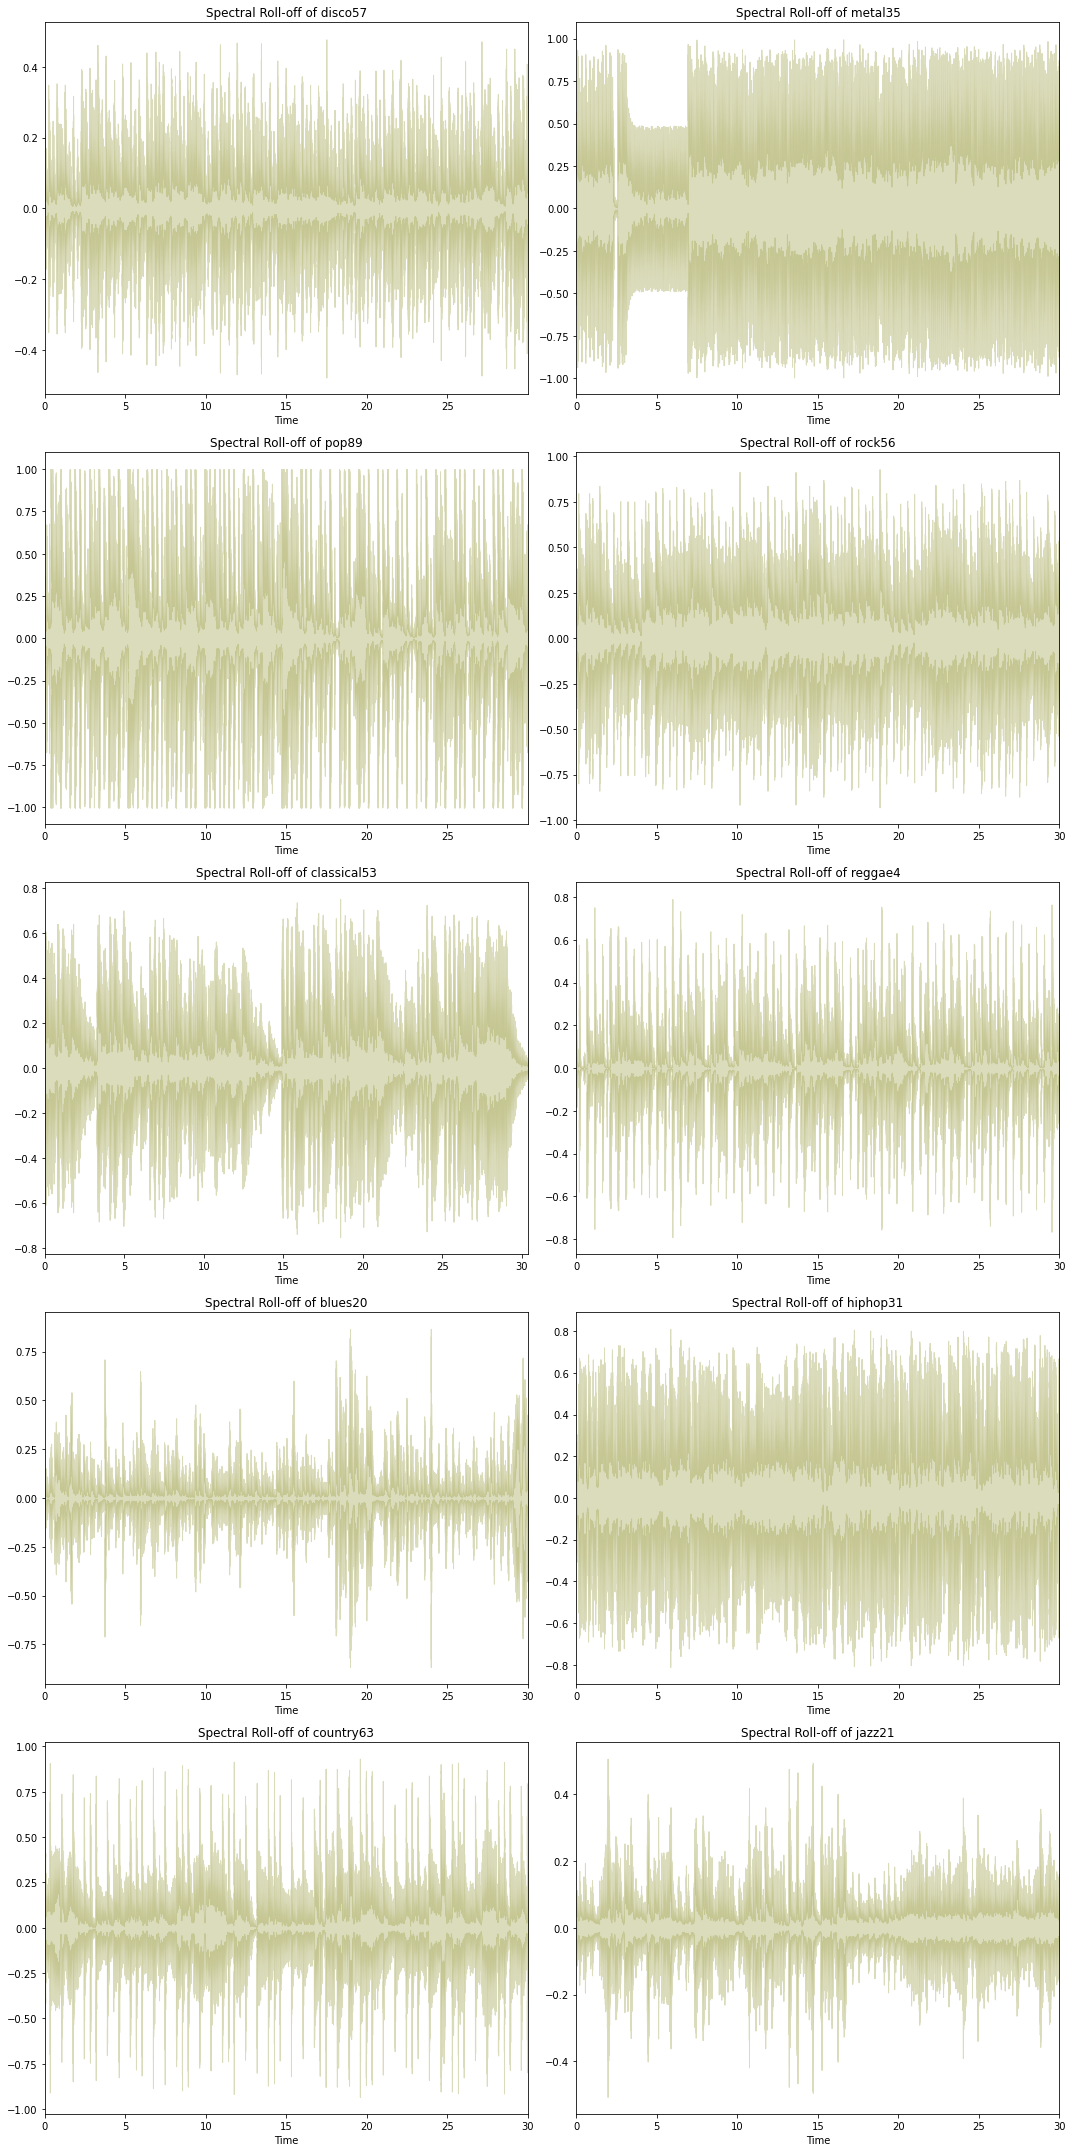

In [ ]:
# Spectral Roll-off

fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
i,j=0,0
for genre in genre_classes:
    n=random.randint(0, 99)
    if (n<10): file=genre+".0000"+str(n)+".wav"
    else: file=genre+".000"+str(n)+".wav"
    if(file in corrupt): file=genre+".00000.wav"
    number=path + genre + "/" + file
    data, sampling_rate = librosa.load(number)
    spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sampling_rate)[0]
    librosa.display.waveplot(data,sr=sampling_rate,alpha=0.4,color="#a6a857",ax=axes[i][j])
    axes[i][j].set(title='Spectral Roll-off of '+genre+str(n))
    if j==1: i+=1
    j=1-j
plt.tight_layout()
plt.show()


In [ ]:
path

'genres_original/'

In [ ]:
data,sampling_rate=librosa.load(path+'blues/blues.00000.wav')

In [ ]:
x=envelope(data,sampling_rate,0.01)
data2=data[x]

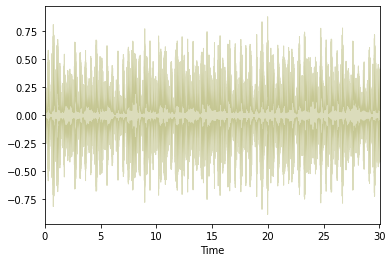

In [ ]:
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sampling_rate)[0]
librosa.display.waveplot(data,sr=sampling_rate,alpha=0.4,color="#a6a857")

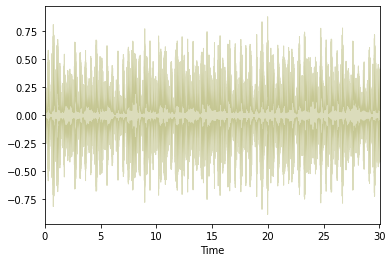

In [ ]:
spectral_rolloff=librosa.feature.spectral_rolloff(data2+0.01,sr=sampling_rate)[0]
librosa.display.waveplot(data2,sr=sampling_rate,alpha=0.4,color="#a6a857")

In [ ]:
df

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.002827             1784.165850          129774.064525   
1    0.002373             1530.176679          375850.073649   
2    0.002746             1552.811865          156467.643368   
3    0.006346             1070.106615          184355.942417   
4    0.002303             1835.004266          343399.939274   
..        ...                     ...                    ...   
995  0.000345             2008.149458          282174.689224   
996  0.000588             2006.843354          182114.709510   
997  0.000322             2077.526598          231657.968040   
998  0.001211             1398.699344          240318.731073   
999  0.000336             1609.795082          422203.216152   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                2002.449060            85882.761315  ...   52.420910   
1                2039.036516           213843.755497  ...   55.356403   
2                1747.702312            76254.192257  ...   40.598766   
3                1596.412872           166441.494769  ...   44.427753   
4                1748.172116            88445.209036  ...   86.099236   
..                       ...                     ...  ...         ...   
995              2106.541053            88609.749506  ...   45.050526   
996              2068.942009            82426.016726  ...   33.851742   
997              1927.293153            74717.124394  ...   33.597008   
998              1818.450280           109090.207161  ...   46.324894   
999              1797.213044           120115.632927  ...   59.167755   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0      -1.690215   36.524071    -0.408979   41.597103    -2.303523   
1      -0.731125   60.314529     0.295073   48.120598    -0.283518   
2      -7.729093   47.639427    -1.816407   52.382141    -3.439720   
3      -3.319597   50.206673     0.636965   37.319130    -0.619121   
4      -5.454034   75.269707    -0.916874   53.613918    -4.404827   
..           ...         ...          ...         ...          ...   
995   -13.289984   41.754955     2.484145   36.778877    -6.713265   
996   -10.848309   39.395096     1.881229   32.010040    -7.461491   
997   -12.845291   36.367264     3.440978   36.001110   -12.588070   
998    -4.416050   43.583942     1.556207   34.331261    -5.041897   
999    -7.069775   73.760391     0.028346   76.504326    -2.025783   

     mfcc19_var  mfcc20_mean  mfcc20_var  label  
0     55.062923     1.221291   46.936035  blues  
1     51.106190     0.531217   45.786282  blues  
2     46.639660    -2.231258   30.573025  blues  
3     37.259739    -3.407448   31.949339  blues  
4     62.910812   -11.703234   55.195160  blues  
..          ...          ...         ...    ...  
995   54.866825    -1.193787   49.950665   rock  
996   39.196327    -2.795338   31.773624   rock  
997   42.502201    -2.106337   29.865515   rock  
998   47.227180    -3.590644   41.299088   rock  
999   72.189316     1.155239   49.662510   rock  


# Work

In [ ]:
# y, sr = librosa.load(audio_files[0])
# S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128*2)
# print("Shape of Mel Spectogram", S.shape)
# # use that converting function as above
# S_db_mel = librosa.amplitude_to_db(S, ref=np.max)



In [ ]:
# # plot the mel spectogram
# fig, ax = plt.subplots(figsize=(10,5))
# img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
# ax.set_title('Mel Spectogram Example', fontsize=20)
# fig.colorbar(img, ax=ax, format=f'%0.2f');

In [ ]:
df.shape

(9990, 60)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611           4.349644e+05               543.854449   
min                472.741636           8.118813e+02               499.162910   
25%               1630.680158           1.231961e+05              1887.455790   
50%               2208.628236           2.650692e+05              2230.575595   
75%               2712.581884           5.624152e+05              2588.340505   
max               5432.534406           4.794119e+06              3708.147554   

       spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean   mfcc16_var  \
count            9.990000e+03   9990.000000  ...  9990.000000  9990.000000   
mean             1.182711e+05   4566.076592  ...     1.448240    49.988755   
std              1.013505e+05   1642.065335  ...     5.735149    34.442816   
min              1.183520e+03    658.336276  ...   -26.850016     1.325786   
25%              4.876553e+04   3378.311110  ...    -2.227478    29.584894   
50%              8.996072e+04   4631.377892  ...     1.461623    41.702393   
75%              1.585674e+05   5591.634521  ...     5.149752    59.274619   
max              1.235143e+06   9487.446477  ...    39.144405   683.932556   

       mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  mfcc19_mean  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     -4.198706    51.962753     0.739943    52.488851    -2.497306   
std       5.677379    36.400669     5.181313    38.177120     5.111799   
min     -27.809795     1.624544   -20.733809     3.437439   -27.448456   
25%      -7.951722    29.863448    -2.516638    29.636197    -5.734123   
50%      -4.443021    42.393583     0.733772    41.831377    -2.702366   
75%      -0.726945    61.676964     3.888734    62.033906     0.514246   
max      34.048843   529.363342    36.970322   629.729797    31.365425   

        mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  
mean     54.973829    -0.917584    57.322614  
std      41.585677     5.253243    46.444212  
min       3.065302   -35.640659     0.282131  
25%      30.496412    -4.004475    30.011365  
50%      43.435253    -1.030939    44.332155  
75%      65.328602     2.216603    68.210421  
max    1143.230591    34.212101   910.473206  

[8 rows x 58 columns]

In [ ]:
# check for null values
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [ ]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [ ]:
df = df.drop(['filename'],axis=1)
df.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [ ]:
encoder = LabelEncoder()
scaler = StandardScaler()

In [ ]:
x=df.drop(['label'],axis=1)
y=df['label']

In [ ]:
print(x.shape,y.shape)

(9990, 58) (9990,)


In [ ]:
X = scaler.fit_transform(x)
Y = encoder.fit_transform(y)

In [ ]:
print(X.shape,Y.shape)

(9990, 58) (9990,)


In [ ]:
# Split the data in train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [ ]:
TRAIN_SIZE=x_train.shape[0]
VAL_SIZE=int(0.2*TRAIN_SIZE)
x_val=x_train[:VAL_SIZE]
y_val=y_train[:VAL_SIZE]
x_train=x_train[VAL_SIZE:]
y_train=y_train[VAL_SIZE:]

In [ ]:
print("Train")
print(x_train.shape, y_train.shape)
print("Validation")
print(x_val.shape, y_val.shape)
print("Test")
print(x_test.shape, y_test.shape)

Train
(6394, 58) (6394,)
Validation
(1598, 58) (1598,)
Test
(1998, 58) (1998,)


# Base Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [ ]:
def model_train(model,x_train,y_train,x_test,y_test,name):
  model.fit(x_train,y_train)
  test_pred=model.predict(x_test)
  # print(test_pred)

  print(model.score(x_test,y_test))
  # print(f"{name} Model Results")
  # print(f'Accuracy == {accuracy_score(y_test,test_pred)}')
  # print(f'F1 == {f1_score(y_test,test_pred,average=None)}')
  # print(f'Precision == {precision_score(y_test,test_pred,average=None)}')
  # print(f'Recall == {recall_score(y_test,test_pred,average=None)}')

## Linear Regression

In [ ]:
linear_reg=LinearRegression()

In [ ]:
linear_reg.fit(x_train,y_train)
print(linear_reg.score(x_test,y_test))

0.25590362390125887


## KNeighborsClassifier

In [ ]:
kn=KNeighborsClassifier()

In [ ]:
kn.fit(x_train,y_train)
test_pred=kn.predict(x_test)
print(f'Accuracy == {accuracy_score(y_test,test_pred)}')

Accuracy == 0.8553553553553553


# DecisionTreeClassifier

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
test_pred=clf.predict(x_test)
print(f'Accuracy == {accuracy_score(y_test,test_pred)}')

Accuracy == 0.6381381381381381


# Deep Learning

In [ ]:
params={
    "input_shape":x_train.shape[1],
    "dropout":0.2,
    "optimizer":"adam"
}

In [ ]:
def make_model(params):
  model = Sequential([
      Dense(512, activation="relu", input_shape=(x_train.shape[1],)),
      Dropout(params["dropout"]),
      Dense(256,activation="relu"),
      Dropout(params["dropout"]),
      Dense(128,activation="relu"),
      Dropout(params["dropout"]),
      Dense(64,activation="relu"),
      Dropout(params["dropout"]),
      Dense(10, activation="softmax"),
  ])
  model.compile(optimizer=params['optimizer'],loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model=make_model(params=params)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               30208     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)               

In [ ]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=300, batch_size=256)

Epoch 1/300
25/25 [==============================] - 4s 18ms/step - loss: 1.8411 - accuracy: 0.3563 - val_loss: 1.2928 - val_accuracy: 0.5388
Epoch 2/300
25/25 [==============================] - 0s 9ms/step - loss: 1.3006 - accuracy: 0.5457 - val_loss: 1.0230 - val_accuracy: 0.6514
Epoch 3/300
25/25 [==============================] - 0s 8ms/step - loss: 1.0668 - accuracy: 0.6356 - val_loss: 0.8783 - val_accuracy: 0.6934
Epoch 4/300
25/25 [==============================] - 0s 7ms/step - loss: 0.9442 - accuracy: 0.6863 - val_loss: 0.7938 - val_accuracy: 0.7259
Epoch 5/300
25/25 [==============================] - 0s 9ms/step - loss: 0.8236 - accuracy: 0.7274 - val_loss: 0.7126 - val_accuracy: 0.7491
Epoch 6/300
25/25 [==============================] - 0s 9ms/step - loss: 0.7513 - accuracy: 0.7498 - val_loss: 0.6453 - val_accuracy: 0.7728
Epoch 7/300
25/25 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.7732 - val_loss: 0.6330 - val_accuracy: 0.7760
Epoch 8/300


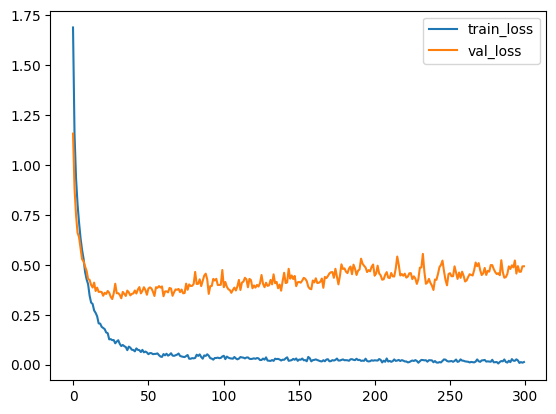

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

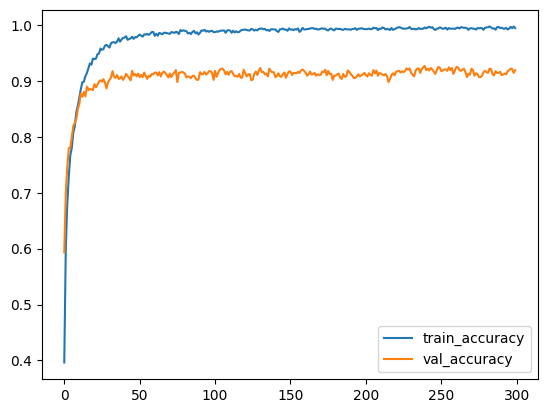

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
# loss,accuracy = model.evaluate(x_test, y_test, batch_size=128)


16/16 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.9234


In [ ]:
y_prob = model.predict(x_test)

# convert probabilities to integer labels
y_pred = np.argmax(y_prob, axis=1)

63/63 [==============================] - 0s 1ms/step


In [ ]:
print(f'Accuracy == {accuracy_score(y_test,y_pred)}')
print(f'F1 == {f1_score(y_test,y_pred,average="macro")}')
print(f'Precision == {precision_score(y_test,y_pred,average="macro")}')
print(f'Recall == {recall_score(y_test,y_pred,average="macro")}')

Accuracy == 0.9054054054054054
F1 == 0.9057295860255417
Precision == 0.9066215114426945
Recall == 0.9060842725423551


In [ ]:
target_names=[i for i in range(10)]
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat,cmap="BuPu", annot=True, xticklabels = target_names, yticklabels = target_names )

<Axes: >